## AUTOSCOUT Price Prediction Project

### 1- Project Overview

* This project is the second step of the AUTOSCOUT_EDA Project which is also in my Machine Learning Projects repository.

* Auto Scout data which I use for this project, scraped from the on-line car trading company in 2019, 
contains many features of 9 different car models. 

* In this project, I will use the data sets prepared for algorithms as a result of the EDA project.
Therefore, I will not focus on EDA process as I will be working on the edited data.

* I will estimate the prices of cars using regression algorithms.

* I will implement Linear Regression, Ridge Regression, Lasso Regression, Random Forest and XG Boost algorithms respectively. 


### 2- Environmental Preperation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [6]:
import pickle

with open('golden_data_dummy.pkl', 'rb') as f:
    scout = pickle.load(f)

In [7]:
scout.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,0,14500,2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1

In [11]:
scout.shape

(14990, 136)

### 3- EDA

* Since we have an elaborative EDA with this data done, we will only have a quick look before we dive in Machine Learning process.

In [12]:
scout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14990 entries, 0 to 15918
Columns: 136 entries, displacement to type_Used
dtypes: float64(86), int64(5), uint8(45)
memory usage: 11.2 MB


In [21]:
dict(scout.isnull().sum()).values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
scout.corr()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
displacement,1.000000,0.608069,0.306380,0.039455,0.219180,0.256791,0.075198,0.284346,0.008668,0.011990,-0.027629,0.074994,0.040186,-0.068584,0.189355,0.120051,0.093023,0.023463,-0.025445,0.016656,0.155963,0.238145,0.231315,0.065404,-0.002173,-0.010773,0.083568,0.020423,0.028805,0.096878,0.256626,0.119077,0.021156,-0.015159,0.301022,0.210824,0.079801,-0.062517,0.118577,0.050395,-0.045213,0.043899,0.006824,0.074122,0.023921,0.073918,0.095232,0.194647,-0.031875,0.054721,0.055488,0.180902,0.258627,0.080848,0.185683,0.015742,0.264346,-0.026980,0.315147,0.099103,0.175466,0.171587,0.003036,0.210162,0.033420,0.106227,0.142446,0.206100,0.150223,0.040066,0.315579,0.137866,0.173044,0.288962,0.177198,0.321708,0.164884,0.008568,0.141231,0.101375,0.200238,0.083617,0.035517,0.132019,0.048803,0.022716,0.023678,0.126828,0.149427,0.142996,0.121389,-0.145343,0.172593,-0.042373,-0.366143,0.004982,0.160892,-0.002986,-0.233842,-0.149290,0.241430,0.384161,-0.264699,0.030706,-0.009449,0.016306,-0.015619,-0.107400,0.263748,0.022227,0.220528,0.001957,0.043107,-0.040263,0.007676,0.028954,-0.000089,0.090535,0.011614,-0.135907,0.051144,0.015976,-0.077658,-0.032720,0.199475,-0.233892,0.101407,0.647354,-0.004512,-0.643471,-0.027935,-0.036014,-0.002039,-0.089162,-0.104255,0.132912
hp,0.608069,1.000000,0.013735,-0.025535,0.252995,0.331149,0.040451,0.433349,-0.026401,-0.048050,0.068875,0.071932,0.015297,-0.003288,0.376480,0.187941,0.066705,-0.007980,0.071563,0.022344,0.

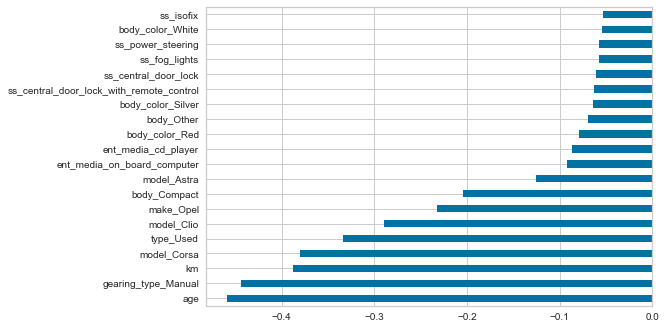

In [204]:
scout.corr()['price'].sort_values().head(20).plot.barh()

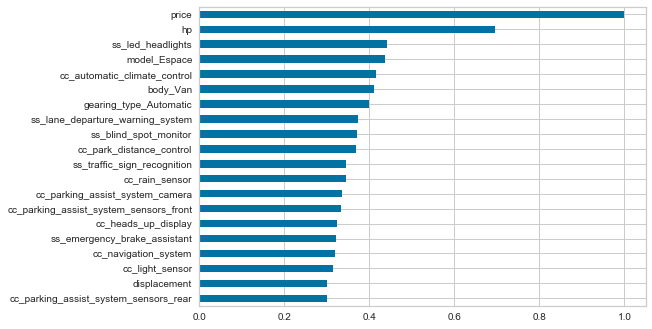

In [203]:
scout.corr()['price'].sort_values().tail(20).plot.barh()

In [28]:
scout.describe()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
count,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.00000

### 4- Machine Learning Process

Now that our data frame seems to be ready for nachine learning process, we are going to train our models and evaluate all the models performance respectively. Let's start with the Linear Regression model.

   #### I- Linear Regression

* Splitting the data

In [29]:
X = scout.drop('price', axis=1)
y = scout.price

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

* Forming Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
scout_lm = LinearRegression()

* Training Linear Regression

In [34]:
scout_lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Model First Evaluation

In [35]:
scout_lm.intercept_

12142.604538542848

In [36]:
scout_coef = pd.DataFrame(data = scout_lm.coef_, index = X.columns, columns = ["Coefficient"])

In [175]:
scout_coef.T

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
Coefficient,-0.905741,97.518344,-0.036889,-101.795533,-16.977428,242.795153,70.692247,-604.373248,-335.982409,123.247479,-243.982851,58.909495,-177.790143,-463.108803,-3.135803,-850.089268,-224.667954,-10.779578,-149.668124,-275.833355,-195.315938,559.288161,827.79188,211.31987,645.807555,-385.567952,-668.69616,176.838966,67.899359,194.709207,64.1669,-354.69936,76.468096,-76.792765,-1564.486111,-506.54592,96.172335,922.18629,-116.32911,-105.64107,-108.798308,344.102993,-86.896792,-1620.760445,-296.720761,323.609714,67.679787,-115.41774,428.617413,-384.044024,19.589818,285.560907,-243.31507,138.970583,-1830.349445,-122.800252,159.605127,328.01712,631.470974,2077.164184,427.509985,218.238257,350.339096,-247.660389,79.454942,145.392451,-106.749387,192.065212,137.525799,507.661084,106.284929,717.410306,38.976102,1194.689158,249.486377,-482.150229,73.890016,-247.967097,-15.1452,1079.887375,-260.364152,-117.429374,940.143592,16.380186,65.658215,-595.60536,695.297244,-551.907061,126.656488,-188.450817,2897.2933,-2238.415312,-658.877988,-2024.707246,5717.280302,-795.279755,-1034.437704,-4049.585139,-2353.938693,3390.707151,1149.961085,87.276321,-1075.615896,-182.389602,358.912207,-360.456689,68.232822,228.518712,-776.341436,1651.863563,703.966117,723.502482,630.650226,-348.343523,100.338833,931.22054,826.249488,-5519.050052,409.548145,550.040049,-1181.292448,902.268165,1270.901978,-175.279685,-1809.246673,1984.526358,1185.672277,-2325.730297,366.3253

* Prediction and Evaluation Metrics

In [39]:
y_pred = scout_lm.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
def eval_metrics(actual, pred):
    """
    Returns evaluation metrics: mae, mse, rmse and r2 score  
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print(f"r2_score: {score} \n mae: {mae} \n mse: {mse} \n rmse: {rmse}")

In [43]:
eval_metrics(y_test, y_pred)

r2_score: 0.8823996677679183 
 mae: 1692.3716761713215 
 mse: 5956038.826831411 
 rmse: 2440.4997084268234


* Scoring and Comparison

In [44]:
scout_lm.score(X_test, y_test)

0.8823996677679183

In [53]:
comparison = {"Actual": y_test, "Model prediction": y_pred, "Diff": y_pred-y_test, 
              "Diff %": 100*(y_pred-y_test)/y_test}
comparison_df = pd.DataFrame(comparison).round(1)

In [177]:
comparison_df.head(20)

,Actual,Model prediction,Diff,Diff %
5130,26290,23355.3,-2934.7,-11.2
4174,18950,17577.0,-1373.0,-7.2
15198,21890,22839.4,949.4,4.3
14107,9990,8571.0,-1419.0,-14.2
4396,19770,17704.9,-2065.1,-10.4
1736,16985,20377.5,3392.5,20.0
773,19000,18393.1,-606.9,-3.2
6859,12636,14291.7,1655.7,13.1
14338,9990,12624.2,2634.2,26.4
10212,10980,13938.9,2958.9,26.9


* Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = scout_lm, X = X_train, y = y_train, cv = 10)
print(f"Accuracy after cross validation: {accuracies.mean():0.4f} (+/- {accuracies.std()*2:0.2f})")

Accuracy after cross validation: 0.8902 (+/- 0.01)


* Yellowbrick Score Vizs

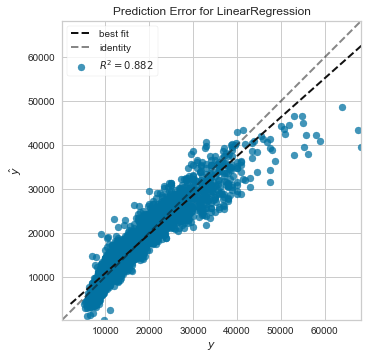

In [57]:
from yellowbrick.regressor import PredictionError
viz = PredictionError(scout_lm)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

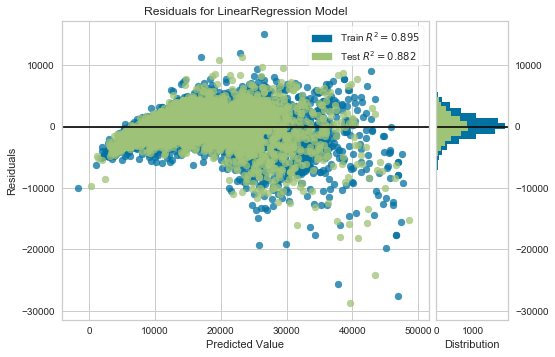

In [59]:
from yellowbrick.regressor import ResidualsPlot
viz = ResidualsPlot(scout_lm)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

#### II-Ridge Regression

* Scaling

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
X_train_trns = scaler.transform(X_train)

In [65]:
X_test_trns = scaler.transform(X_test)

In [66]:
scout_transformed = pd.DataFrame(X_train_trns, columns=X.columns)

In [67]:
scout_transformed.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,-0.026966,-0.833420,-0.120950,0.232489,-0.289577,-0.390699,-0.376695,-0.301331,0.402969,-0.427041,0.642121,5.58472,0.268641,0.355175,-0.493675,-0.320401,-1.130645,-0.401466,0.637329,-1.997887,-0.767026,-0.502861,-0.485705,-0.072143,0.322287,0.305051,-0.241165,0.350894,0.622525,-1.697676,-0.381847,-0.544401,-1.328690,-0.538097,1.395980,0.481944,-0.68666,-0.413923,-1.358620,-0.779025,-2.258641,0.434999,-0.405803,-0.048943,-1.156144,0.540358,0.091253,0.683365,0.216333,-0.059979,-0.966025,-1.184570,-0.133169,-1.668562,-0.009979,-0.265432,-1.991699,-0.3779,-0.25207,-0.199388,-0.508295,1.101182,-0.453638,-0.055644,-1.306246,-1.01192,-0.519905,-0.157135,-1.730557,-1.108738,-0.196946,-1.458325,-0.540712,-0.232965,-0.801973,-1.348882,0.272035,-1.140296,-0.932288,-0.240239,-0.420830,0.837804,-0.160757,-0.318698,-0.045775,-0.02641,0.374105,-0.638565,-0.213034,-0.632235,1.331744,-0.914889,-0.474557,2.280215,-0.009979,-0.498662,-0.430621,-0.367154,-0.407632,-0.263708,-0.431108,2.040465,-0.019961,-0.04467,-0.034587,-0.137368,-1.006694,-0.53702,-0.076215,-0.232489,-0.083779,1.672845,-0.315465,-0.017286,-0.140348,-0.098756,-0.540865,-0.014113,-0.261542,-0.349102,-0.034587,-0.510775,-0.05192,-0.922629,0.980378,-0.176677,1.06963,-0.014113,-1.061746,-0.059137,-0.231536,-0.270342,-0.243926,-0.318698,0.604077
1,1.976075,0.811359,0.036095,0.232489,3.453311,-0.390699,2.654671,-0.301331,0.402969,-0.427041,-1.557340,-0.17906,0.268641,-2.815513,-0.493675,-0.320401,-

* Forming Ridge Regression 

In [68]:
from sklearn.linear_model import Ridge

In [69]:
scout_ridge = Ridge()

* Training Ridge Regression

In [71]:
scout_ridge.fit(X_train_trns, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

* Model Evaluation

In [72]:
scout_ridge.intercept_

17765.78661754456

In [75]:
coeff_ridge = pd.DataFrame(data = scout_ridge.coef_, index = X.columns, columns = ["Coefficient"])

In [178]:
coeff_ridge.T

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
Coefficient,-245.672372,2607.212225,-1377.299855,-22.508171,-4.509646,82.279266,23.316008,-166.89779,-116.489636,44.399887,-110.952,10.204807,-44.523341,-146.002601,-1.195548,-246.9628,-111.586457,-3.704305,-67.838274,-110.42672,-94.336511,224.596892,325.345645,15.148682,188.531282,-107.5914,-152.393125,55.269221,30.431365,85.155602,21.382109,-148.825157,63.524676,-32.090065,-1727.992956,-198.121493,44.794588,325.889433,-55.526553,-51.257014,-40.335394,125.877619,-30.28667,-79.153169,-146.816106,210.459195,32.298209,-53.752541,88.555422,-22.934294,9.863068,140.849645,-31.843171,61.265737,-18.262683,-30.419286,63.896811,108.538649,149.620674,398.308265,172.517754,108.570023,131.744694,-13.726486,38.326651,72.691124,-43.729173,29.497526,59.569913,252.466275,20.179181,334.597048,16.38167,263.943727,121.730462,-230.551218,18.670427,-122.83059,-7.451209,245.268477,-93.010012,-57.646303,147.325885,4.748389,3.001414,-15.727632,228.197216,-250.314671,25.776955,-85.09506,715.644174,-554.188222,-174.586085,183.168473,82.193919,689.689198,-379.215436,-1016.453827,-826.610038,1059.537512,414.513681,-49.585249,-25.681451,-17.584539,5.091043,-77.239512,-72.145471,6.662485,-74.847587,317.795659,-0.785962,4.502747,-23.735438,-18.353048,-84.354392,21.304496,47.240046,-87.918104,-74.37296,-50.835856,-65.432835,76.520135,28.911832,325.861452,-490.080003,482.043886,204.656667,-43.723893,-203.318989,-0.045505,488.65111,-196.266582,368.120165,-9.722413,-316.050968

* Prediction and Evaluation Metrics

In [79]:
y_pred_ridge = scout_ridge.predict(X_test_trns)

In [80]:
eval_metrics(y_test, y_pred_ridge)

r2_score: 0.8823984021749376 
 mae: 1692.3363018351197 
 mse: 5956102.924617441 
 rmse: 2440.5128404942766


* Scoring and Comparison

In [81]:
scout_ridge.score(X_test_trns, y_test)

0.8823984021749376

In [82]:
comparison_ridge = {"Actual": y_test, "Model prediction": y_pred_ridge, "Diff": y_pred_ridge-y_test, 
              "Diff %": 100*(y_pred_ridge-y_test)/y_test}
comparison_ridge_df = pd.DataFrame(comparison_ridge).round(1)

In [176]:
comparison_ridge_df.head(20)

,Actual,Model prediction,Diff,Diff %
5130,26290,23355.2,-2934.8,-11.2
4174,18950,17576.9,-1373.1,-7.2
15198,21890,22840.1,950.1,4.3
14107,9990,8570.4,-1419.6,-14.2
4396,19770,17704.2,-2065.8,-10.4
1736,16985,20377.0,3392.0,20.0
773,19000,18394.9,-605.1,-3.2
6859,12636,14292.6,1656.6,13.1
14338,9990,12625.1,2635.1,26.4
10212,10980,13939.3,2959.3,27.0


* Cross Validation

In [86]:
accuracies_ridge = cross_val_score(estimator = scout_ridge, X = X_train_trns, y = y_train, cv = 10)
accuracies_ridge.mean()

0.8901376433683567

In [87]:
scout_ridge.alpha

1.0

* Yellowbrick Viz Score of The Ridge

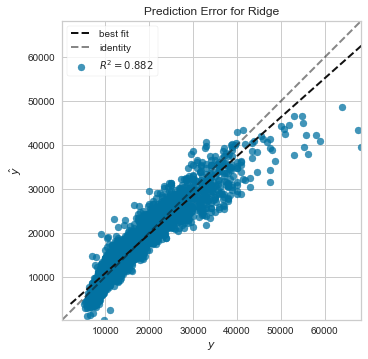

In [88]:
viz_ridge = PredictionError(scout_ridge)
viz_ridge.fit(X_train_trns, y_train)
viz_ridge.score(X_test_trns, y_test)
viz_ridge.show()

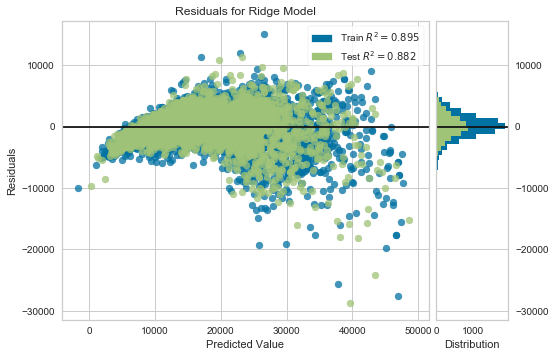

In [89]:
viz_ridge_resid = ResidualsPlot(scout_ridge)
viz_ridge_resid.fit(X_train_trns, y_train)
viz_ridge_resid.score(X_test_trns, y_test)
viz_ridge_resid.show()

* Finding Best Alpha With Ridge Cross Validation

In [90]:
alpha_space = np.linspace(.1,20,100)

In [91]:
from sklearn.linear_model import RidgeCV

In [92]:
ridgecv = RidgeCV(alphas = alpha_space, cv=10)
ridgecv.fit(X_train_trns, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [93]:
ridgecv.alpha_

20.0

In [179]:
alpha_space = np.linspace(20,50)

In [180]:
ridgecv = RidgeCV(alphas = alpha_space, cv=10)
ridgecv.fit(X_train_trns, y_train)

RidgeCV(alphas=array([20.        , 20.6122449 , 21.2244898 , 21.83673469, 22.44897959,
       23.06122449, 23.67346939, 24.28571429, 24.89795918, 25.51020408,
       26.12244898, 26.73469388, 27.34693878, 27.95918367, 28.57142857,
       29.18367347, 29.79591837, 30.40816327, 31.02040816, 31.63265306,
       32.24489796, 32.85714286, 33.46938776, 34.08163265, 34.69387755,
       35.30612245, 35.91836735, 36.53061224, 37.14285714, 37.75510204,
       38.36734694, 38.97959184, 39.59183673, 40.20408163, 40.81632653,
       41.42857143, 42.04081633, 42.65306122, 43.26530612, 43.87755102,
       44.48979592, 45.10204082, 45.71428571, 46.32653061, 46.93877551,
       47.55102041, 48.16326531, 48.7755102 , 49.3877551 , 50.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [181]:
ridgecv.alpha_

41.42857142857143

* Finding The Best Alpha With Yellowbrick

In [97]:
from yellowbrick.regressor import ManualAlphaSelection

In [184]:
alpha_space = np.linspace(20,50)

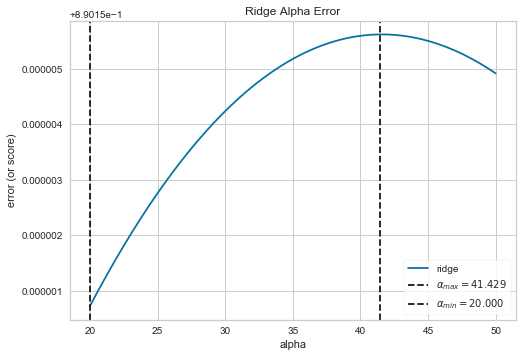

In [185]:
viz = ManualAlphaSelection(Ridge(), alphas = alpha_space, cv = 10)
viz.fit(X_train_trns, y_train)
viz.show()

* Training Ridge Model Again With The Best Alpha

In [186]:
scout_best_ridge = Ridge(41.429).fit(X_train_trns, y_train)

In [188]:
accuracies = cross_val_score(estimator=scout_best_ridge, X=X_train_trns, y=y_train, cv=10)
print(f"Accuracy with best alpha: {accuracies.mean():0.4f} (+/- {accuracies.std()*2:0.2f})")

Accuracy with best alpha: 0.8902 (+/- 0.01)


* Feature importance of Ridge Model With Yellowbricks

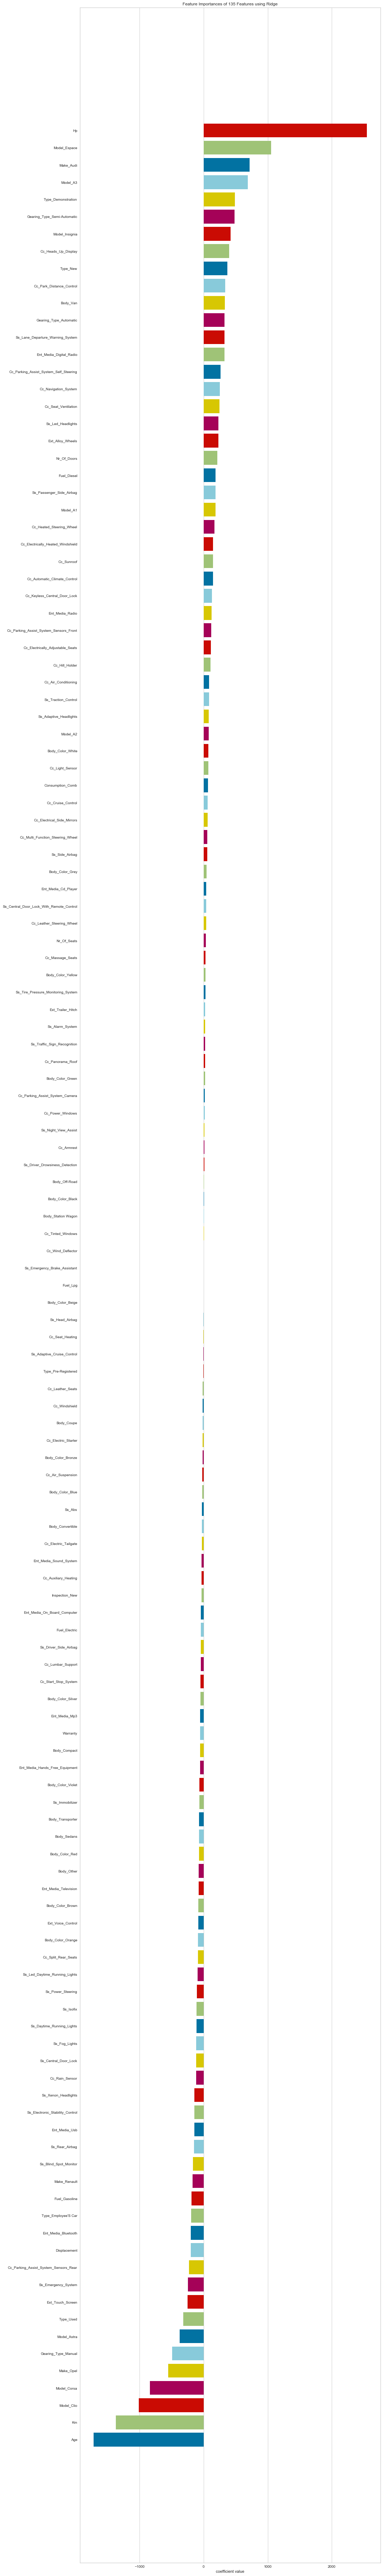

In [193]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(scout_best_ridge, labels=labels, relative=False)
visualizer = RadViz(size = (1080, 7200))
viz.fit(X_train_trns, y_train)
viz.show()

#### III-Lasso Regression

We already have a scaled data then we will start with forming the Lasso Regression.

* Forming Lasso Regression

In [120]:
from sklearn.linear_model import Lasso

In [121]:
scout_lasso = Lasso()

* Training Lasso Regression

In [123]:
scout_lasso.fit(X_train_trns, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
scout_lasso.intercept_

17765.78661754456

In [126]:
coeff_lasso = pd.DataFrame(data = scout_lasso.coef_, index = X.columns, columns = ["Coefficient"])

In [194]:
coeff_lasso.T

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
Coefficient,-232.641875,2602.131828,-1375.078897,-21.977255,-2.527022,80.333535,21.874407,-163.11455,-115.337194,39.141749,-108.996308,8.940071,-41.193813,-143.600502,0.0,-245.927001,-110.996524,-0.0,-66.41367,-109.287582,-92.539991,224.668926,324.85903,14.00616,185.751579,-106.937335,-151.650868,53.151302,27.551424,83.078558,19.465529,-146.229771,57.7675,-31.980008,-1730.374823,-198.640176,41.953202,325.282072,-54.66635,-50.321657,-39.115375,124.815866,-29.297362,-78.628197,-145.624743,209.941214,31.65202,-52.706461,87.282131,-21.807254,9.501869,141.792705,-30.74091,59.905786,-17.458992,-26.870108,62.128942,108.464295,148.625029,397.211326,169.10964,107.061791,129.994802,-13.133628,37.173532,67.928207,-42.723195,28.460458,57.419314,251.20441,19.377374,330.277417,14.909702,263.01203,118.946753,-224.101797,17.043645,-118.043734,-4.501293,244.725803,-88.321428,-55.072961,146.397652,2.837428,2.114076,-14.468534,227.095382,-249.132552,24.202712,-83.998212,1633.12811,-24.717908,-0.0,0.0,76.397178,489.264543,-249.204038,-702.216647,-701.927776,1298.207107,543.330796,0.0,-21.822099,-10.871284,8.817977,-59.355969,-7.738054,58.147108,-63.676756,346.382229,-0.684368,0.0,-25.537725,-17.509737,-84.608232,19.591307,42.417421,-86.846796,-76.12282,-53.494191,-64.711013,71.772266,27.717617,284.660832,-532.38664,466.314068,305.503482,-39.647299,-90.186818,11.617444,574.491403,-96.165475,457.989386,103.527205,-141.30475


* Prediction and Evaluation Metrics of Lasso

In [130]:
y_pred_lasso = scout_lasso.predict(X_test_trns)

In [131]:
eval_metrics(y_test, y_pred_lasso)

r2_score: 0.8824570142154688 
 mae: 1691.4948624173132 
 mse: 5953134.433096219 
 rmse: 2439.904595080762


* Scoring and Comparison of Lasso

In [132]:
scout_lasso.score(X_test_trns, y_test)

0.8824570142154688

In [133]:
comparison_lasso = {"Actual": y_test, "Model prediction": y_pred_lasso, "Diff": y_pred_lasso-y_test, 
              "Diff %": 100*(y_pred_lasso-y_test)/y_test}
comparison_lasso_df = pd.DataFrame(comparison_lasso).round(1)

In [134]:
comparison_lasso_df

,Actual,Model prediction,Diff,Diff %
5130,26290,23373.2,-2916.8,-11.1
4174,18950,17561.1,-1388.9,-7.3
15198,21890,22859.1,969.1,4.4
14107,9990,8571.4,-1418.6,-14.2
4396,19770,17701.9,-2068.1,-10.5
...,...,...,...,...
15303,32900,21902.6,-10997.4,-33.4
10547,17900,17858.5,-41.5,-0.2
11093,12499,16402.5,3903.5,31.2
3409,20000,23881.1,3881.1,19.4


* Cross Validation

In [136]:
accuracies_lasso = cross_val_score(estimator = scout_lasso, X = X_train_trns, y = y_train, cv = 10)
accuracies_lasso.mean()

0.8901970231543064

In [137]:
scout_lasso.alpha

1.0

* Yellowbrick Viz Score of Lasso

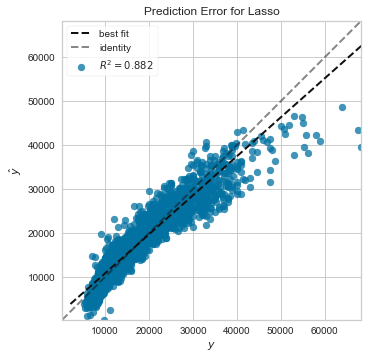

In [138]:
viz_lasso = PredictionError(scout_lasso)
viz_lasso.fit(X_train_trns, y_train)
viz_lasso.score(X_test_trns, y_test)
viz_lasso.show()

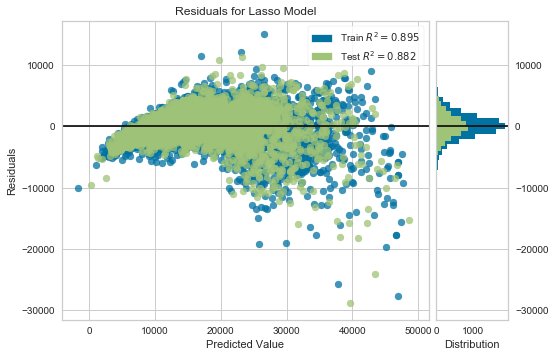

In [140]:
viz_lasso = ResidualsPlot(scout_lasso)
viz_lasso.fit(X_train_trns, y_train)
viz_lasso.score(X_test_trns, y_test)
viz_lasso.show()

* Finding Best Alpha with Lasso Cross Validation

In [157]:
alpha_lasso = np.linspace(.1, 20,500)

In [158]:
from sklearn.linear_model import LassoCV

In [159]:
lassocv = LassoCV(alphas = alpha_lasso, cv=10)
lassocv.fit(X_train_trns, y_train)

LassoCV(alphas=array([ 0.1       ,  0.13987976,  0.17975952,  0.21963928,  0.25951904,
        0.2993988 ,  0.33927856,  0.37915832,  0.41903808,  0.45891784,
        0.4987976 ,  0.53867735,  0.57855711,  0.61843687,  0.65831663,
        0.69819639,  0.73807615,  0.77795591,  0.81783567,  0.85771543,
        0.89759519,  0.93747495,  0.97735471,  1.01723447,  1.05711423,
        1.09699399,  1.13687375,  1.17675351,  1.21663327,  1.25651303,
        1.29639...
       19.44168337, 19.48156313, 19.52144289, 19.56132265, 19.6012024 ,
       19.64108216, 19.68096192, 19.72084168, 19.76072144, 19.8006012 ,
       19.84048096, 19.88036072, 19.92024048, 19.96012024, 20.        ]),
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [160]:
lassocv.alpha_

6.281362725450901

* Finding Best Alpha With Yellowbrick

In [161]:
from yellowbrick.regressor import AlphaSelection
alpha_space = np.linspace(.1, 20, 500)

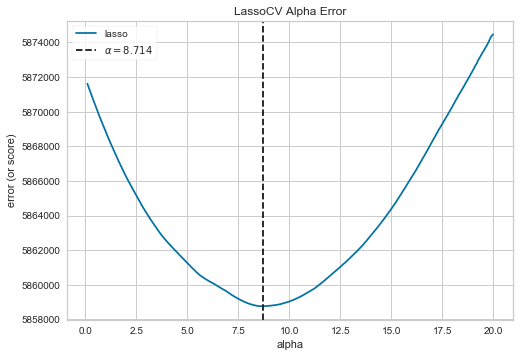

In [162]:
model_lasso = LassoCV(alphas = alpha_space)
viz = AlphaSelection(model_lasso)
viz.fit(X_train_trns, y_train)
viz.show()

* Training Lasso Model Again With Yellowbricks 

In [195]:
scout_lasso = Lasso(6.281362725450901).fit(X_train_trns, y_train)

In [197]:
accuracies_lasso = cross_val_score(estimator = scout_lasso, X = X_train_trns, y = y_train, cv = 10)
print(f"Accuracy with best alpha: {accuracies_lasso.mean():0.4f} (+/- {accuracies_lasso.std()*2:0.2f})")

Accuracy with best alpha: 0.8903 (+/- 0.01)


* Feature importance of Lasso Model With Yellowbrick 

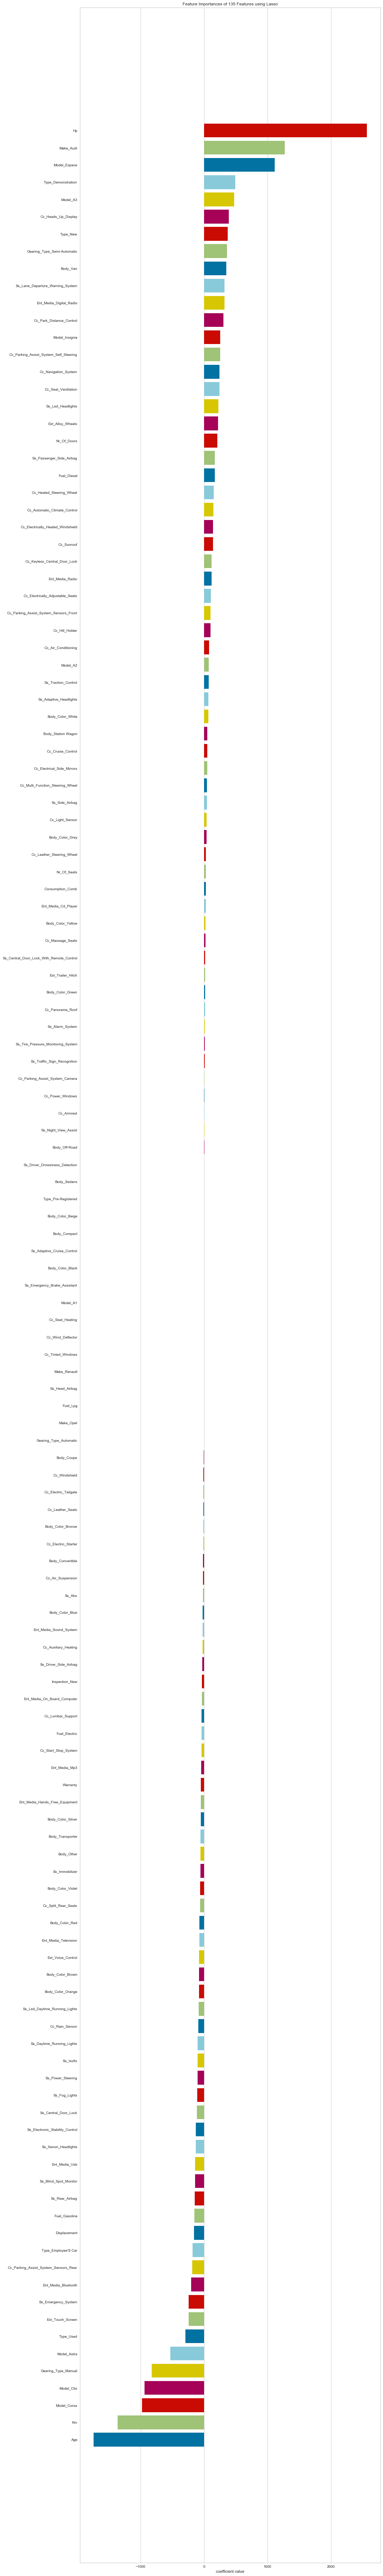

In [173]:
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(scout_lasso, labels = labels, relative = False)
visualizer = RadViz(size = (1080, 7200))

viz.fit(X_train_trns, y_train)
viz.show()